In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Classification

In this tutorial and the one following this we'll learn about classification ie. given an input determine whether it belongs to class A or B etc. Contrast this with linear regression we leared in the previous tutorial. In Linear regression our ML algorithm was predicting a real number as output e.g. stock price. Here, in classification our ML algorithm will predict a discrete class e.g. the input image is of a dog or the input prices suggest this is a 'market entry point (buy stocks)- output is a discrete class not a real number. 

### CIFAR-10

CIFAR-10. One popular toy image classification dataset is the CIFAR-10 dataset. This dataset consists of 60,000 tiny images that are 32 pixels high and wide. Each image is labeled with one of 10 classes (for example “airplane, automobile, bird, etc”). These 60,000 images are partitioned into a training set of 50,000 images and a test set of 10,000 images. In the image below you can see 10 random example images from each one of the 10 classes:

### Nearest neighbour
Suppose now that we are given the CIFAR-10 training set of 50,000 images (5,000 images for every one of the labels), and we wish to label the remaining 10,000. The nearest neighbor classifier will take a test image, compare it to every single one of the training images, and predict the label of the closest training image

Observe the image belwo:
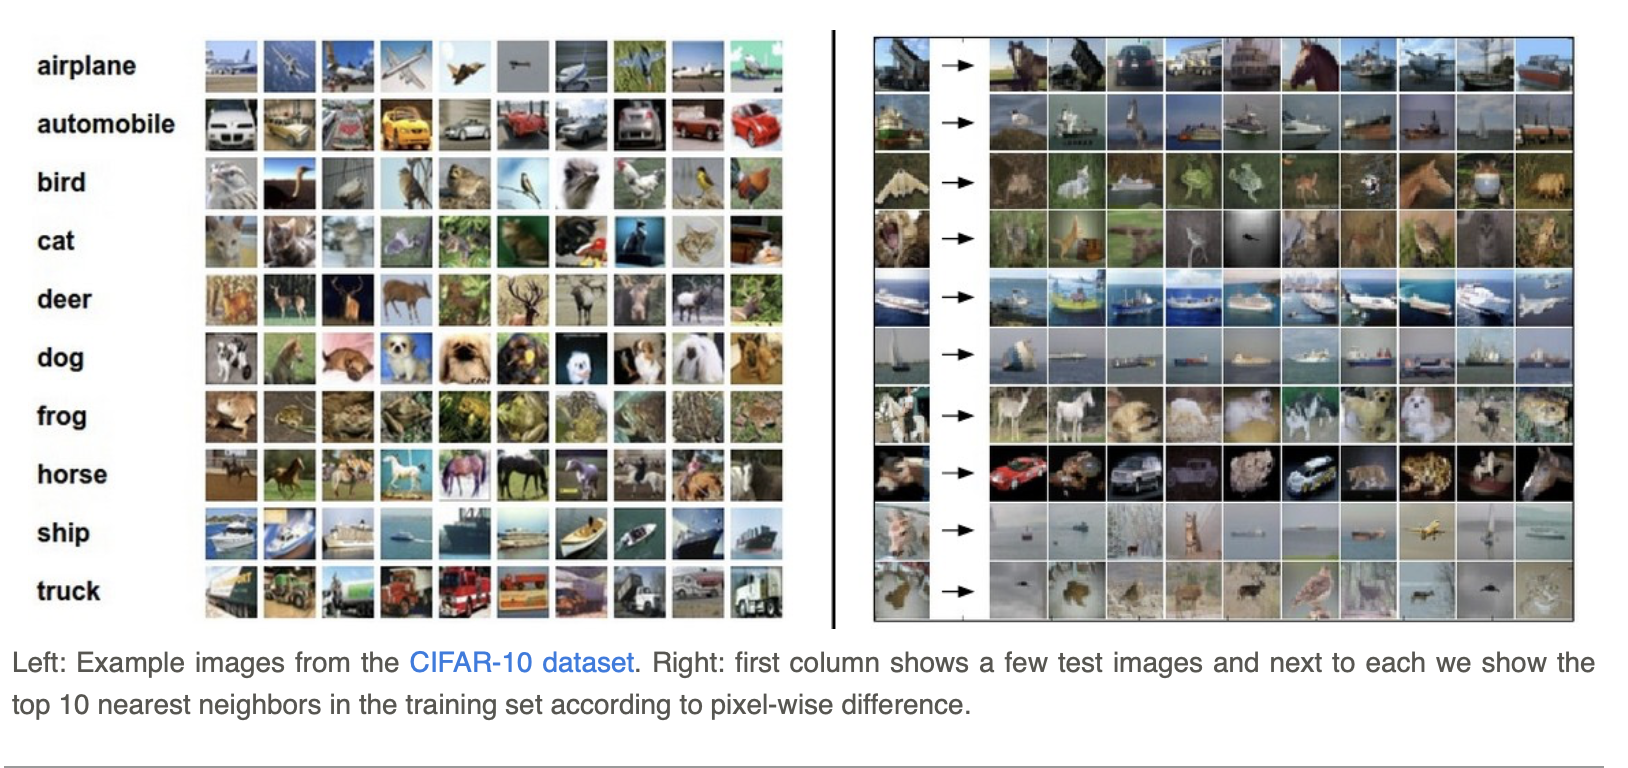

In the image above and on the right you can see an example result of such a procedure for 10 example test images. Notice that in only about 3 out of 10 examples an image of the same class is retrieved, while in the other 7 examples this is not the case. For example, in the 8th row the nearest training image to the horse head is a red car, presumably due to the strong black background. As a result, this image of a horse would in this case be mislabeled as a car.



### Distance between two images:
We can use L1 distance or L2 distance to measure distance between two images. 

Let us copy the snippet from previous tutorial:

### ML Algorithms General Form:
We can write about every machine learning algorithm that exists in the following canonical form: the goal of any machine learning algorithm is to find the parameters that minimize the average of losses on the data. This problem is written formally as:

$$ minimize_{\theta} \  \frac{1}{m} \sum_{1}^{m} l(h_{\theta}(x^{(i)}, y^i) = minimize_{\theta}  \ E(\theta)$$


In the next tutorial, we'll study classification algorithms logistic regression, support vector machine etc and you'll to define them (or any  ML algorithm in general) we'll specify Hypothesis function, Loss function and the way to optimize loss function just like we did here.

### Loss functions in Classification
For classification, loss functions are the one element that is substantially different from the ones in regression.

We can naively use least-squares loss function for classification as we did in regression however when applied to classification itt aims at predicting exactly +1 or −1 on each data point which is wrong in the sense that for a positive class we're also okay with a number much greater than +1. Similarly, for a negative class we're also okay with a number much less than -1. 
Logistic loss is one such loss commonly used in classification. 

## Logistic loss for Logistic Regression:
$$l_{logistic}(h_{\theta}(x),y)= log(1+exp(−h_{\theta}(x)⋅y))$$
For large positive values of $exp(−h_{\theta}(x)⋅y))$ will be very close to zero, so the loss will approach zero; for large negative values $exp(−h_{\theta}(x)⋅y))$ loss increases approximately linearly.

### Plot

In [6]:
import numpy as np
import matplotlib.pyplot as plt

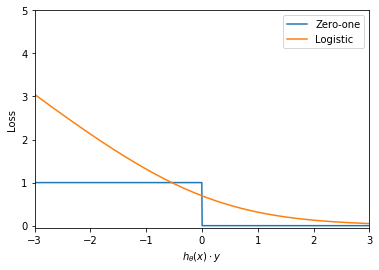

In [7]:
hy = np.linspace(-3,3,1000)
plt.plot(hy,(hy<=0)) # zero-one loss which simply is just the number of mistakes that the classifier makes
plt.plot(hy, np.log(1+np.exp(-hy)))  #logistic loss
plt.xlim([-3,3])
plt.ylim([-0.05, 5])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")
plt.legend(['Zero-one', 'Logistic'])


logistic loss is continuously differentiable and always strictly positive.

### Iris Dataset
Let's load [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn-datasets-load-iris) form sklearn. There are 3 classes (labels) in this dataset. See this [guide](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset) for more information on dataset. 

We'll use this dataset in this tutorial and the one following this one.

This is an easier to learn small dataset in which you'll get very good accuracy.

In [7]:
iris = load_iris()

In [11]:
features = iris.data
labels = iris.target
labels_names = iris.feature_names

In [12]:
labels_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Train/Test Split
Use sklearn as in previous tutorial.

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, labels,\
                                                    test_size=.3, random_state=32)

### Implement Logistic Regression using sklearn
The interface of classes is pretty uniform in sklearn. You'll notice similarities with linear regression in the previous tutorial.

In [36]:
logisticRegr = LogisticRegression(max_iter=140) # sklearn func- imported above
logisticRegr.fit(x_train, y_train) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=140,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Notice the parameter max_iter=140-  default value is 100 we increased it to 140 as the optimization method 'lbgfs' does not converge within 100 iterations (Try decreasing it from 140). Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression) for more information on solvers.

In [49]:
y_pred = logisticRegr.predict(x_test) # Predict on test data
y_pred

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       0])

In [50]:
logisticRegr.score(x_test, y_test) # R2 score=1.

1.0

### Accuracy
Accuracy is number of correct predictions to the total number of examples/datapoints/samples. For example, if our test data has 1000 images, and our classifier 
Note that good accuracy is not always a warrant for a good classifier. For example, for a binary classification task on a dataset with unbalanced distribution of classes (your dataset has 998 images on horses and 2 images of camels), you can simply create a classifier with very good accuracy with one line of code: 
```Python
def classifier(data):
    return 'horse'
```
This- useless- classifier will get correct predictions 98% of the times. There is another way to get a better picture of usefuless of a classifier.

Let's compute accuracy of our iris dataset (test set).

In [51]:
accuracy_score(y_test, y_pred) # Accuracy is 100.

1.0

### Confusion Matrix (To evaluate the accuracy of a classification)
[Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is matrix layout in which each row represents the instances in an actual class while each column represents the instances in a predicted class. Specifically, each element $C_{i,j}$ is equal to the number of observations known to be in group i and predicted to be in group j. 

See [Confusion Matrix Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix) for more information.

Think of an example for better understanding.

Let's implement confusion matrix using sklearn.

In [44]:
confusion_matrix(y_test, y_pred) # a diagnoal matrix in our case. Why?

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 14]])

More Information on evaluation metrics and other tips and tricks is [here](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks)